In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import io
import shutil
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [9]:
whole = pd.read_csv('~/OneDrive/python3/aminomap/Amyloid_prediction/df04_n.csv', index_col=0)
whole.shape

(239, 38)

In [10]:
whole.head(10)

,Sequence,Amyloid,s1,p1,h1,i1,a1,b1,s2,p2,...,h5,i5,a5,b5,s6,p6,h6,i6,a6,b6
0,AAELRN,0,0.305489,0.121951,0.404908,0.405648,1.0,0.235294,0.305489,0.121951,...,0.000000,1.000000,0.793103,0.294118,0.381862,0.317073,0.125767,0.458280,0.275862,0.205882
1,AARRFF,0,0.305489,0.121951,0.404908,0.405648,1.0,0.235294,0.305489,0.121951,...,0.858896,0.349166,0.586207,0.676471,0.701671,0.707317,0.858896,0.349166,0.586207,0.676471
2,AEKLFD,0,0.305489,0.121951,0.404908,0.405648,1.0,0.235294,0.372315,0.365854,...,0.858896,0.349166,0.586207,0.676471,0.381862,0.268293,0.073620,0.000000,0.413793,0.147059
3,AEMEYL,0,0.305489,0.121951,0.404908,0.405648,1.0,0.235294,0.372315,0.365854,...,0.604294,0.347882,0.413793,0.764706,0.618138,0.463415,0.831288,0.396662,0.896552,0.470588
4,AENGKS,0,0.305489,0.121951,0.404908,0.405648,1.0,0.235294,0.372315,0.365854,...,0.006135,0.903723,0.655172,0.352941,0.312649,0.146341,0.297546,0.353017,0.241379,0.382353
5,AEVLAL,0,0.305489,0.121951,0.404908,0.405648,1.0,0.235294,0.372315,0.365854,...,0.404908,0.405648,1.000000,0.235294,0.618138,0.463415,0.831288,0.396662,0.896552,0.470588
6,AGVNYF,1,0.305489,0.121951,0.404908,0.405648,1.0,0.235294,0.000000,0.000000,...,0.604294,0.347882,0.413793,0.764706,0.701671,0.707317,0.858896,0.349166,0.586207,0.676471
7,AINKIQ,0,0.305489,0.121951,0.404908,0.405648,1.0,0.235294,1.000000,0.463415,...,0.861963,0.396662,0.586207,0.882353,0.372315,0.439024,0.242331,0.346598,0.793103,0.294118
8,ALEEYT,1,0.305489,0.121951,0.404908,0.405648,1.0,0.235294,0.618138,0.463415,...,0.604294,0.347882,0.413793,0.764706,0.723150,0.268293,0.389571,0.340180,0.275862,0.617647
9,AQFIIS,1,0.305489,0.121951,0.404908,0.405648,1.0,0.235294,0.372315,0.439024,...,0.861963,0.396662,0.586207,0.882353,0.312649,0.146341,0.297546,0.353017,0.241379,0.382353


In [11]:
whole=whole.round(2)
whole_zero=whole[whole["Amyloid"]==0].reset_index()#.drop("index",axis=1)
whole_one=whole[whole["Amyloid"]==1].reset_index()

2D-dataframe was generated by using the dataset of aminoacid parameter.

In [12]:
FIRST=[1,0,0,0,0,0]
SECOND=[0,1,0,0,0,0]
THIRD=[0,0,1,0,0,0]
FOURTH=[0,0,0,1,0,0]
FIFTH=[0,0,0,0,1,0]
SIXTH=[0,0,0,0,0,1]
FIRSTdf=pd.DataFrame(FIRST)
SECONDdf=pd.DataFrame(SECOND)
THIRDdf=pd.DataFrame(THIRD)
FOURTHdf=pd.DataFrame(FOURTH)
FIFTHdf=pd.DataFrame(FIFTH)
SIXTHdf=pd.DataFrame(SIXTH)

number=137
for i in range(number):
    
    FIRSTp=whole_zero.loc[i,["s1","p1","h1","i1","a1","b1"]]
    SECONDp=whole_zero.loc[i,["s2","p2","h2","i2","a2","b2"]]
    THIRDp=whole_zero.loc[i,["s3","p3","h3","i3","a3","b3"]]
    FOURTHp=whole_zero.loc[i,["s4","p4","h4","i4","a4","b4"]]
    FIFTHp=whole_zero.loc[i,["s5","p5","h5","i5","a5","b5"]]
    SIXTHp=whole_zero.loc[i,["s6","p6","h6","i6","a6","b6"]]

    FIRSTp_df=pd.DataFrame(FIRSTp).T
    SECONDp_df=pd.DataFrame(SECONDp).T
    THIRDp_df=pd.DataFrame(THIRDp).T
    FOURTHp_df=pd.DataFrame(FOURTHp).T
    FIFTHp_df=pd.DataFrame(FIFTHp).T
    SIXTHp_df=pd.DataFrame(SIXTHp).T

    A=np.dot(FIRSTdf,FIRSTp_df)
    B=np.dot(SECONDdf,SECONDp_df)
    C=np.dot(THIRDdf,THIRDp_df)
    D=np.dot(FOURTHdf,FOURTHp_df)
    E=np.dot(FIFTHdf,FIFTHp_df)
    F=np.dot(SIXTHdf,SIXTHp_df)
    
    X=A+B+C+D+E+F
    print(X)

[[0.31 0.12 0.4 0.41 1.0 0.24]
 [0.31 0.12 0.4 0.41 1.0 0.24]
 [0.37 0.37 0.11 0.02 1.0 0.18]
 [0.62 0.46 0.83 0.4 0.9 0.47]
 [0.56 0.71 0.0 1.0 0.79 0.29]
 [0.38 0.32 0.13 0.46 0.28 0.21]]
[[0.31 0.12 0.4 0.41 1.0 0.24]
 [0.31 0.12 0.4 0.41 1.0 0.24]
 [0.56 0.71 0.0 1.0 0.79 0.29]
 [0.56 0.71 0.0 1.0 0.79 0.29]
 [0.7 0.71 0.86 0.35 0.59 0.68]
 [0.7 0.71 0.86 0.35 0.59 0.68]]
[[0.31 0.12 0.4 0.41 1.0 0.24]
 [0.37 0.37 0.11 0.02 1.0 0.18]
 [0.45 0.54 0.01 0.9 0.66 0.35]
 [0.62 0.46 0.83 0.4 0.9 0.47]
 [0.7 0.71 0.86 0.35 0.59 0.68]
 [0.38 0.27 0.07 0.0 0.41 0.15]]
[[0.31 0.12 0.4 0.41 1.0 0.24]
 [0.37 0.37 0.11 0.02 1.0 0.18]
 [0.56 0.54 0.69 0.35 0.86 0.5]
 [0.37 0.37 0.11 0.02 1.0 0.18]
 [0.7 0.73 0.6 0.35 0.41 0.76]
 [0.62 0.46 0.83 0.4 0.9 0.47]]
[[0.31 0.12 0.4 0.41 1.0 0.24]
 [0.37 0.37 0.11 0.02 1.0 0.18]
 [0.38 0.32 0.13 0.46 0.28 0.21]
 [0.0 0.0 0.31 0.4 0.0 0.0]
 [0.45 0.54 0.01 0.9 0.66 0.35]
 [0.31 0.15 0.3 0.35 0.24 0.38]]
[[0.31 0.12 0.4 0.41 1.0 0.24]
 [0.37 0.37 0.11 0.0

[[0.45 0.54 0.01 0.9 0.66 0.35]
 [0.31 0.12 0.4 0.41 1.0 0.24]
 [1.0 0.46 0.86 0.4 0.59 0.88]
 [0.62 0.46 0.83 0.4 0.9 0.47]
 [0.7 0.71 0.86 0.35 0.59 0.68]
 [0.62 0.46 0.83 0.4 0.9 0.47]]
[[0.45 0.54 0.01 0.9 0.66 0.35]
 [0.37 0.37 0.11 0.02 1.0 0.18]
 [0.42 0.32 0.78 0.44 0.14 0.76]
 [0.62 0.46 0.83 0.4 0.9 0.47]
 [1.0 0.46 0.86 0.4 0.59 0.88]
 [0.38 0.32 0.13 0.46 0.28 0.21]]
[[0.45 0.54 0.01 0.9 0.66 0.35]
 [0.37 0.37 0.11 0.02 1.0 0.18]
 [0.38 0.32 0.13 0.46 0.28 0.21]
 [1.0 0.46 0.86 0.4 0.59 0.88]
 [1.0 0.46 0.86 0.4 0.59 0.88]
 [0.7 0.71 0.86 0.35 0.59 0.68]]
[[0.45 0.54 0.01 0.9 0.66 0.35]
 [0.0 0.0 0.31 0.4 0.0 0.0]
 [0.37 0.37 0.11 0.02 1.0 0.18]
 [0.38 0.32 0.13 0.46 0.28 0.21]
 [0.7 0.71 0.86 0.35 0.59 0.68]
 [0.72 0.27 0.39 0.34 0.28 0.62]]
[[0.45 0.54 0.01 0.9 0.66 0.35]
 [0.62 0.46 0.83 0.4 0.9 0.47]
 [0.62 0.46 0.83 0.4 0.9 0.47]
 [0.37 0.37 0.11 0.02 1.0 0.18]
 [1.0 0.46 0.86 0.4 0.59 0.88]
 [0.31 0.12 0.4 0.41 1.0 0.24]]
[[0.45 0.54 0.01 0.9 0.66 0.35]
 [0.56 0.54 0.

 [0.0 0.0 0.31 0.4 0.0 0.0]]
[[0.72 0.27 0.39 0.34 0.28 0.62]
 [0.31 0.12 0.4 0.41 1.0 0.24]
 [0.37 0.37 0.11 0.02 1.0 0.18]
 [0.62 0.46 0.83 0.4 0.9 0.47]
 [1.0 0.46 0.86 0.4 0.59 0.88]
 [0.72 0.27 0.39 0.34 0.28 0.62]]
[[0.72 0.27 0.39 0.34 0.28 0.62]
 [0.31 0.12 0.4 0.41 1.0 0.24]
 [0.77 1.0 1.0 0.38 0.66 0.79]
 [0.7 0.73 0.6 0.35 0.41 0.76]
 [0.31 0.12 0.4 0.41 1.0 0.24]
 [0.37 0.37 0.11 0.02 1.0 0.18]]
[[0.72 0.27 0.39 0.34 0.28 0.62]
 [0.37 0.37 0.11 0.02 1.0 0.18]
 [0.7 0.71 0.86 0.35 0.59 0.68]
 [0.72 0.27 0.39 0.34 0.28 0.62]
 [0.64 0.0 0.53 0.49 0.0 0.56]
 [0.72 0.27 0.39 0.34 0.28 0.62]]
[[0.72 0.27 0.39 0.34 0.28 0.62]
 [0.7 0.71 0.86 0.35 0.59 0.68]
 [0.77 1.0 1.0 0.38 0.66 0.79]
 [0.37 0.37 0.11 0.02 1.0 0.18]
 [1.0 0.46 0.86 0.4 0.59 0.88]
 [0.31 0.15 0.3 0.35 0.24 0.38]]
[[0.72 0.27 0.39 0.34 0.28 0.62]
 [0.62 0.46 0.83 0.4 0.9 0.47]
 [0.45 0.54 0.01 0.9 0.66 0.35]
 [0.38 0.32 0.13 0.46 0.28 0.21]
 [0.7 0.73 0.6 0.35 0.41 0.76]
 [1.0 0.46 0.86 0.4 0.59 0.88]]
[[0.72 0.2

In [8]:
FIRST=[1,0,0,0,0,0]
SECOND=[0,1,0,0,0,0]
THIRD=[0,0,1,0,0,0]
FOURTH=[0,0,0,1,0,0]
FIFTH=[0,0,0,0,1,0]
SIXTH=[0,0,0,0,0,1]
FIRSTdf=pd.DataFrame(FIRST)
SECONDdf=pd.DataFrame(SECOND)
THIRDdf=pd.DataFrame(THIRD)
FOURTHdf=pd.DataFrame(FOURTH)
FIFTHdf=pd.DataFrame(FIFTH)
SIXTHdf=pd.DataFrame(SIXTH)

number=102
for i in range(number):
    
    FIRSTp=whole_one.loc[i,["s1","p1","h1","i1","a1","b1"]]
    SECONDp=whole_one.loc[i,["s2","p2","h2","i2","a2","b2"]]
    THIRDp=whole_one.loc[i,["s3","p3","h3","i3","a3","b3"]]
    FOURTHp=whole_one.loc[i,["s4","p4","h4","i4","a4","b4"]]
    FIFTHp=whole_one.loc[i,["s5","p5","h5","i5","a5","b5"]]
    SIXTHp=whole_one.loc[i,["s6","p6","h6","i6","a6","b6"]]

    FIRSTp_df=pd.DataFrame(FIRSTp).T
    SECONDp_df=pd.DataFrame(SECONDp).T
    THIRDp_df=pd.DataFrame(THIRDp).T
    FOURTHp_df=pd.DataFrame(FOURTHp).T
    FIFTHp_df=pd.DataFrame(FIFTHp).T
    SIXTHp_df=pd.DataFrame(SIXTHp).T

    A=np.dot(FIRSTdf,FIRSTp_df)
    B=np.dot(SECONDdf,SECONDp_df)
    C=np.dot(THIRDdf,THIRDp_df)
    D=np.dot(FOURTHdf,FOURTHp_df)
    E=np.dot(FIFTHdf,FIFTHp_df)
    F=np.dot(SIXTHdf,SIXTHp_df)
    
    X=A+B+C+D+E+F
    print(X)
    

[[0.31 0.12 0.4 0.41 1.0 0.24]
 [0.0 0.0 0.31 0.4 0.0 0.0]
 [0.88 0.34 0.68 0.39 0.48 1.0]
 [0.38 0.32 0.13 0.46 0.28 0.21]
 [0.7 0.73 0.6 0.35 0.41 0.76]
 [0.7 0.71 0.86 0.35 0.59 0.68]]
[[0.31 0.12 0.4 0.41 1.0 0.24]
 [0.62 0.46 0.83 0.4 0.9 0.47]
 [0.37 0.37 0.11 0.02 1.0 0.18]
 [0.37 0.37 0.11 0.02 1.0 0.18]
 [0.7 0.73 0.6 0.35 0.41 0.76]
 [0.72 0.27 0.39 0.34 0.28 0.62]]
[[0.31 0.12 0.4 0.41 1.0 0.24]
 [0.37 0.44 0.24 0.35 0.79 0.29]
 [0.7 0.71 0.86 0.35 0.59 0.68]
 [1.0 0.46 0.86 0.4 0.59 0.88]
 [1.0 0.46 0.86 0.4 0.59 0.88]
 [0.31 0.15 0.3 0.35 0.24 0.38]]
[[0.31 0.12 0.4 0.41 1.0 0.24]
 [0.31 0.15 0.3 0.35 0.24 0.38]
 [0.31 0.15 0.3 0.35 0.24 0.38]
 [0.31 0.15 0.3 0.35 0.24 0.38]
 [0.38 0.32 0.13 0.46 0.28 0.21]
 [0.7 0.73 0.6 0.35 0.41 0.76]]
[[0.31 0.12 0.4 0.41 1.0 0.24]
 [0.72 0.27 0.39 0.34 0.28 0.62]
 [0.88 0.34 0.68 0.39 0.48 1.0]
 [1.0 0.46 0.86 0.4 0.59 0.88]
 [1.0 0.46 0.86 0.4 0.59 0.88]
 [0.37 0.37 0.11 0.02 1.0 0.18]]
[[0.38 0.27 0.07 0.0 0.41 0.15]
 [0.42 0.32 0.7

 [0.88 0.34 0.68 0.39 0.48 1.0]]
[[0.38 0.32 0.13 0.46 0.28 0.21]
 [0.7 0.71 0.86 0.35 0.59 0.68]
 [0.0 0.0 0.31 0.4 0.0 0.0]
 [0.31 0.12 0.4 0.41 1.0 0.24]
 [1.0 0.46 0.86 0.4 0.59 0.88]
 [0.62 0.46 0.83 0.4 0.9 0.47]]
[[0.38 0.32 0.13 0.46 0.28 0.21]
 [0.7 0.71 0.86 0.35 0.59 0.68]
 [0.0 0.0 0.31 0.4 0.0 0.0]
 [0.31 0.15 0.3 0.35 0.24 0.38]
 [0.88 0.34 0.68 0.39 0.48 1.0]
 [0.37 0.44 0.24 0.35 0.79 0.29]]
[[0.38 0.32 0.13 0.46 0.28 0.21]
 [0.7 0.71 0.86 0.35 0.59 0.68]
 [0.62 0.46 0.83 0.4 0.9 0.47]
 [0.88 0.34 0.68 0.39 0.48 1.0]
 [0.71 0.56 0.35 0.61 0.48 0.44]
 [0.31 0.15 0.3 0.35 0.24 0.38]]
[[0.38 0.32 0.13 0.46 0.28 0.21]
 [0.71 0.56 0.35 0.61 0.48 0.44]
 [0.88 0.34 0.68 0.39 0.48 1.0]
 [0.72 0.27 0.39 0.34 0.28 0.62]
 [0.62 0.46 0.83 0.4 0.9 0.47]
 [0.31 0.15 0.3 0.35 0.24 0.38]]
[[0.38 0.32 0.13 0.46 0.28 0.21]
 [0.38 0.32 0.13 0.46 0.28 0.21]
 [0.37 0.44 0.24 0.35 0.79 0.29]
 [0.38 0.32 0.13 0.46 0.28 0.21]
 [0.72 0.27 0.39 0.34 0.28 0.62]
 [0.7 0.71 0.86 0.35 0.59 0.68]]
[[

Next, 2D-dataframes was separated into train and validation datafile by train_test_split.

I use the below code and my mouse to make the list of One or Zero index.

In [13]:
number=137
for i in range (number):
    print("matrix_Zero_" + str(i))

matrix_Zero_0
matrix_Zero_1
matrix_Zero_2
matrix_Zero_3
matrix_Zero_4
matrix_Zero_5
matrix_Zero_6
matrix_Zero_7
matrix_Zero_8
matrix_Zero_9
matrix_Zero_10
matrix_Zero_11
matrix_Zero_12
matrix_Zero_13
matrix_Zero_14
matrix_Zero_15
matrix_Zero_16
matrix_Zero_17
matrix_Zero_18
matrix_Zero_19
matrix_Zero_20
matrix_Zero_21
matrix_Zero_22
matrix_Zero_23
matrix_Zero_24
matrix_Zero_25
matrix_Zero_26
matrix_Zero_27
matrix_Zero_28
matrix_Zero_29
matrix_Zero_30
matrix_Zero_31
matrix_Zero_32
matrix_Zero_33
matrix_Zero_34
matrix_Zero_35
matrix_Zero_36
matrix_Zero_37
matrix_Zero_38
matrix_Zero_39
matrix_Zero_40
matrix_Zero_41
matrix_Zero_42
matrix_Zero_43
matrix_Zero_44
matrix_Zero_45
matrix_Zero_46
matrix_Zero_47
matrix_Zero_48
matrix_Zero_49
matrix_Zero_50
matrix_Zero_51
matrix_Zero_52
matrix_Zero_53
matrix_Zero_54
matrix_Zero_55
matrix_Zero_56
matrix_Zero_57
matrix_Zero_58
matrix_Zero_59
matrix_Zero_60
matrix_Zero_61
matrix_Zero_62
matrix_Zero_63
matrix_Zero_64
matrix_Zero_65
matrix_Zero_66
matri

In [14]:
number=102
for i in range (number):
    print("matrix_One_" + str(i))

matrix_One_0
matrix_One_1
matrix_One_2
matrix_One_3
matrix_One_4
matrix_One_5
matrix_One_6
matrix_One_7
matrix_One_8
matrix_One_9
matrix_One_10
matrix_One_11
matrix_One_12
matrix_One_13
matrix_One_14
matrix_One_15
matrix_One_16
matrix_One_17
matrix_One_18
matrix_One_19
matrix_One_20
matrix_One_21
matrix_One_22
matrix_One_23
matrix_One_24
matrix_One_25
matrix_One_26
matrix_One_27
matrix_One_28
matrix_One_29
matrix_One_30
matrix_One_31
matrix_One_32
matrix_One_33
matrix_One_34
matrix_One_35
matrix_One_36
matrix_One_37
matrix_One_38
matrix_One_39
matrix_One_40
matrix_One_41
matrix_One_42
matrix_One_43
matrix_One_44
matrix_One_45
matrix_One_46
matrix_One_47
matrix_One_48
matrix_One_49
matrix_One_50
matrix_One_51
matrix_One_52
matrix_One_53
matrix_One_54
matrix_One_55
matrix_One_56
matrix_One_57
matrix_One_58
matrix_One_59
matrix_One_60
matrix_One_61
matrix_One_62
matrix_One_63
matrix_One_64
matrix_One_65
matrix_One_66
matrix_One_67
matrix_One_68
matrix_One_69
matrix_One_70
matrix_One_71
ma

In [15]:
list_zero=pd.read_csv('~/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/Amyloid_zero_list.csv')#, index_col=0)
list_one=pd.read_csv('~/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/Amyloid_one_list.csv')#, index_col=0)

# concat the dataframe and data-shuffled
df_data = pd.concat([list_zero, list_one], axis=0)
df_data

,id,Amyloid
0,matrix_Zero_0,0
1,matrix_Zero_1,0
2,matrix_Zero_2,0
3,matrix_Zero_3,0
4,matrix_Zero_4,0
5,matrix_Zero_5,0
6,matrix_Zero_6,0
7,matrix_Zero_7,0
8,matrix_Zero_8,0
9,matrix_Zero_9,0


In [16]:
y = df_data["Amyloid"]

df_train, df_val = train_test_split(df_data, test_size=0.30, random_state=101, stratify=y) #stratify=y creates a balanced validation set

print(df_train.shape)
print(df_val.shape)

(167, 2)
(72, 2)


Next, the correct datafolder of "train-One or -Zero" and "validation-One or -Zero" was constructed, and the datafile could transfer in below code. Now this code is working not completely.

This code is supposed by
kaggle HDC, kernel; CNN - How to use 160,000 images without crashing https://www.kaggle.com/masafumiinoue/cnn-how-to-use-160-000-images-without-crashing/edit

In [18]:
train_list =(df_train["id"])
val_list =(df_val["id"])

for i in train_list:
    fname = i + ".csv"
    print(fname)
    target = df_train.loc[:,'Amyloid'].all()
    print(target)
    
    if target == 0:
        Folder = "Zero"
    if target == 1:
        Folder = "One"
    
    src=os.path.join('C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/whole/', fname)
    dst=os.path.join('C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/', Folder, fname)
    shutil.copyfile(src, dst)

for i in val_list:
    fname = i + ".csv"
    target = df_data.loc[:,'Amyloid'].all()
    
    if target == 0:
        Folder = 'Zero'
    if target == 1:
        Folder = 'One'
    
    src = os.path.join('C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/whole/', fname)
    dst = os.path.join('C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation', Folder, fname)
    shutil.copyfile(src, dst)

matrix_Zero_118.csv
False


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/whole/matrix_Zero_118.csv'

2D-dataframe convert to image file.

C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Zero\matrix_Zero_1.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Zero\matrix_Zero_100.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Zero\matrix_Zero_101.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Zero\matrix_Zero_102.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Zero\matrix_Zero_103.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Zero\matrix_Zero_104.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Zero\matrix_Zero_105.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Zero\matrix_Zero_106.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Zero\matrix_Zero_107.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Zero\matrix_Zero_

C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Zero\matrix_Zero_85.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Zero\matrix_Zero_86.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Zero\matrix_Zero_88.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Zero\matrix_Zero_89.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Zero\matrix_Zero_9.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Zero\matrix_Zero_90.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Zero\matrix_Zero_91.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Zero\matrix_Zero_94.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Zero\matrix_Zero_96.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Zero\matrix_Zero_97.csv
C

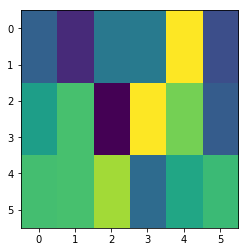

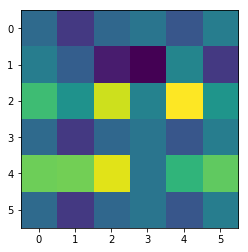

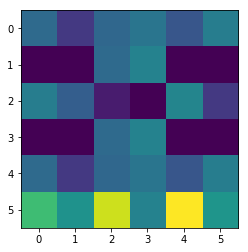

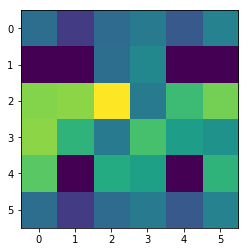

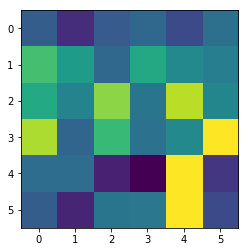

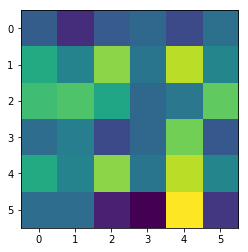

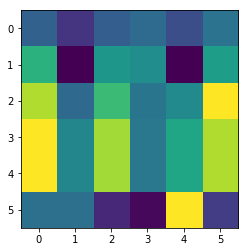

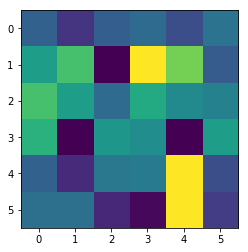

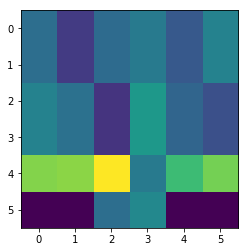

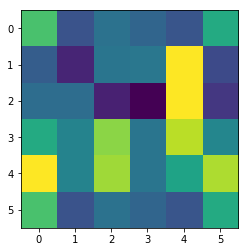

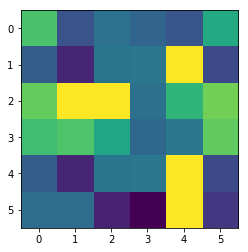

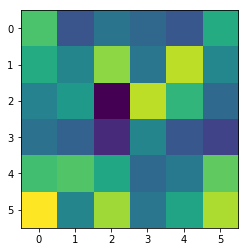

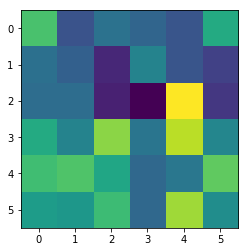

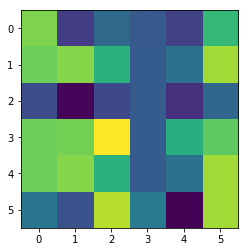

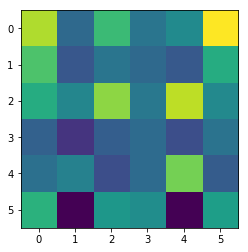

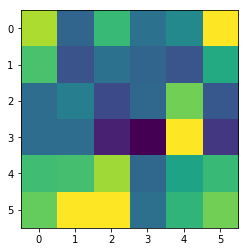

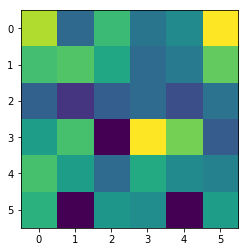

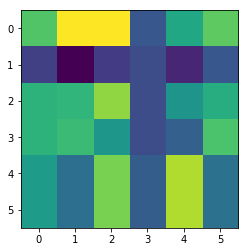

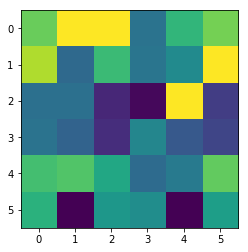

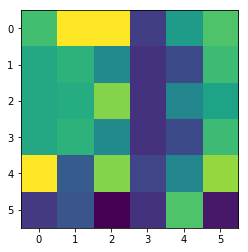

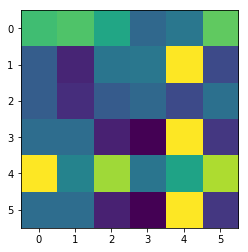

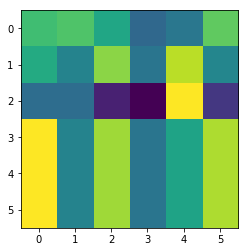

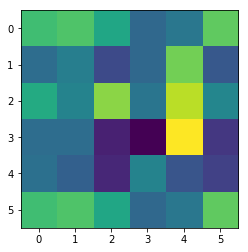

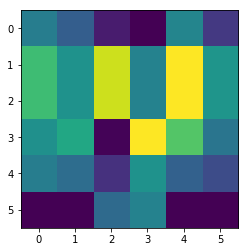

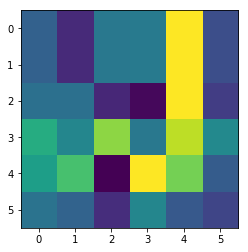

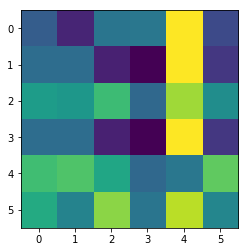

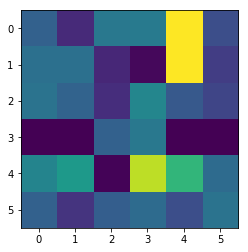

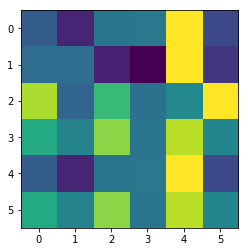

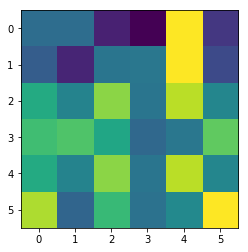

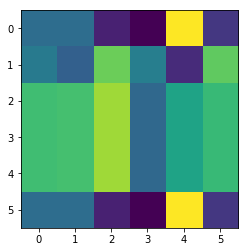

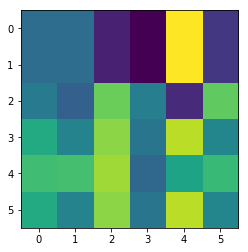

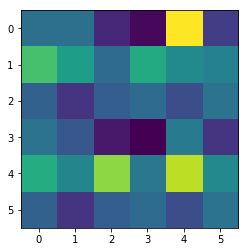

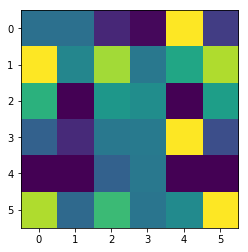

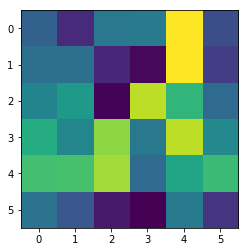

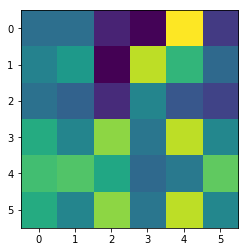

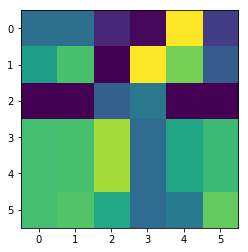

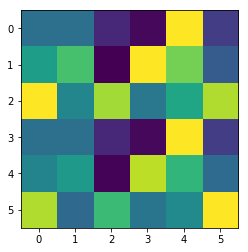

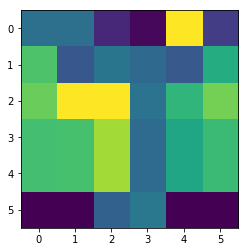

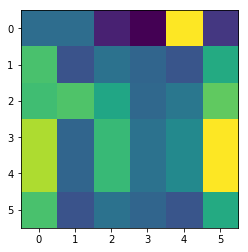

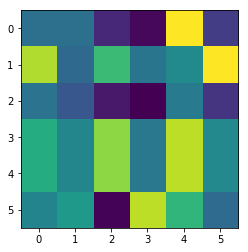

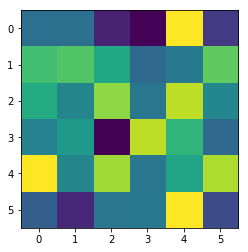

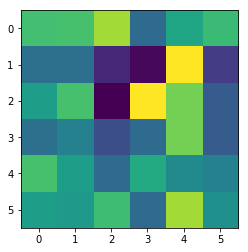

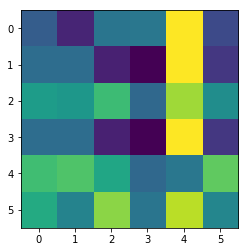

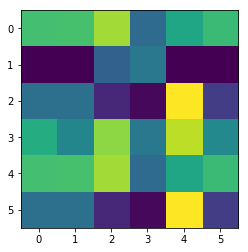

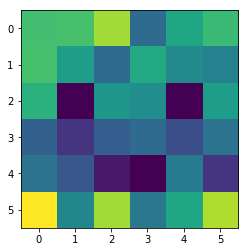

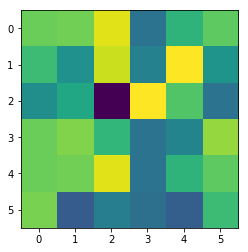

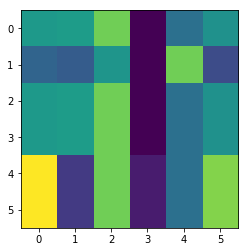

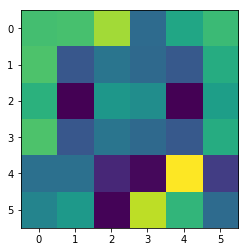

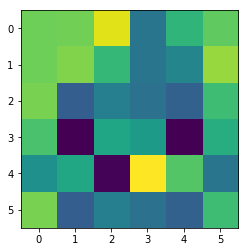

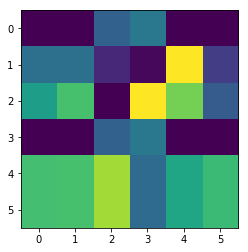

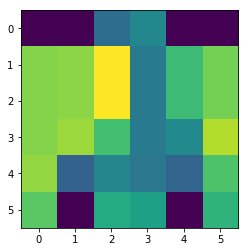

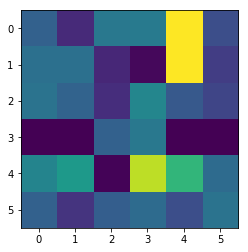

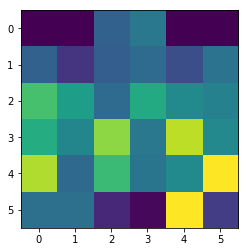

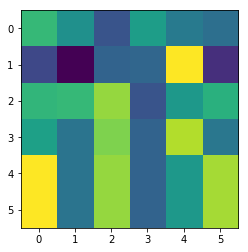

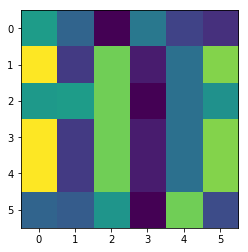

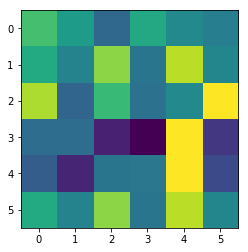

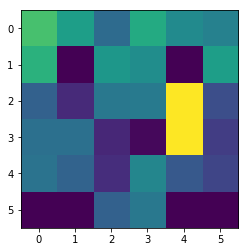

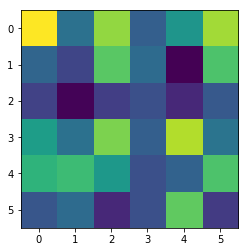

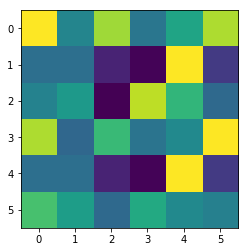

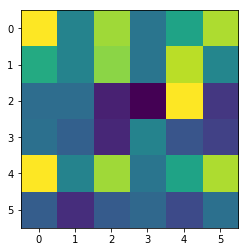

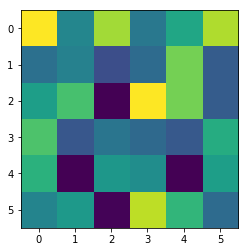

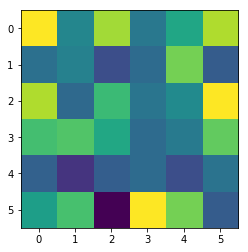

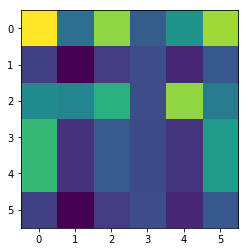

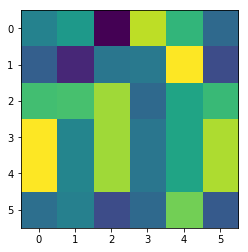

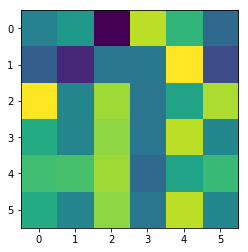

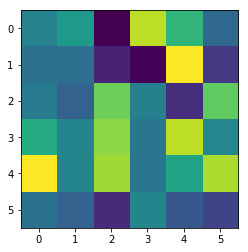

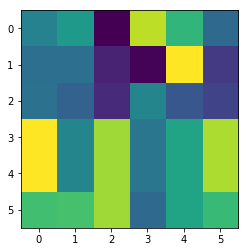

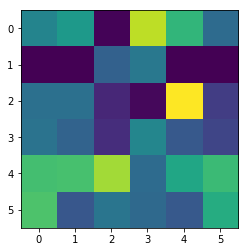

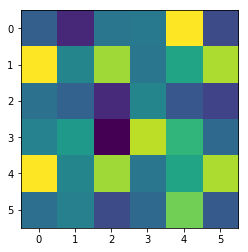

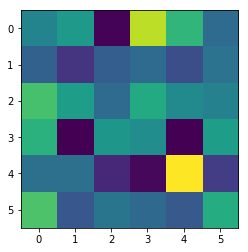

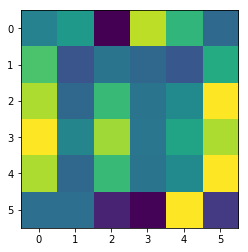

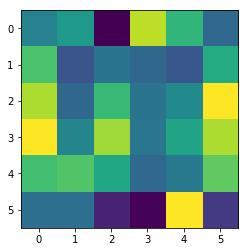

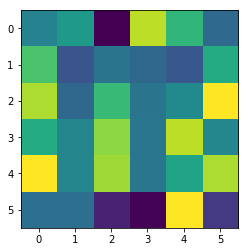

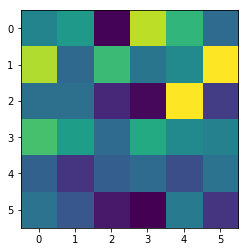

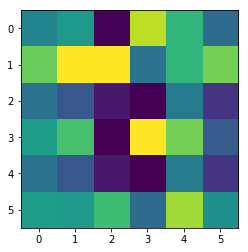

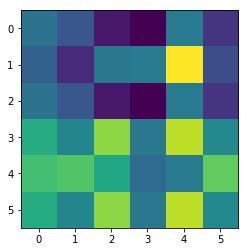

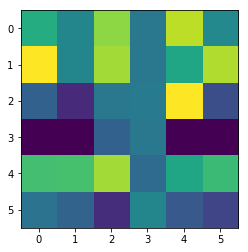

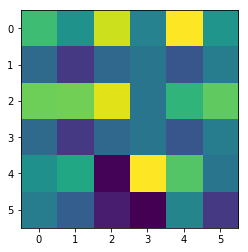

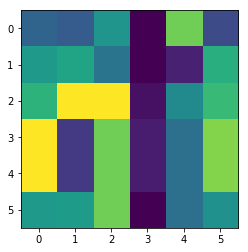

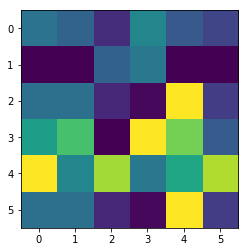

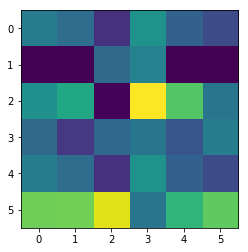

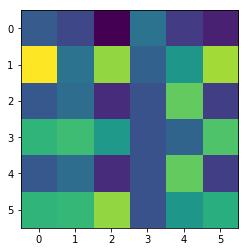

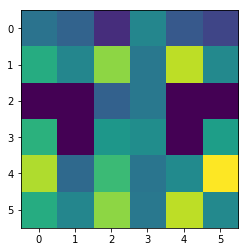

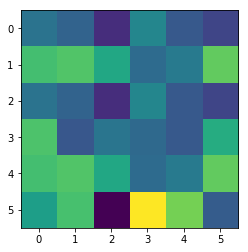

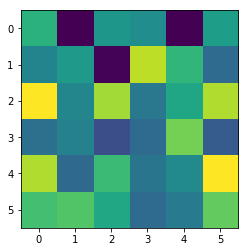

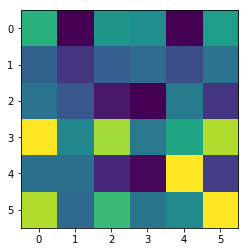

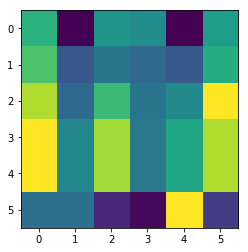

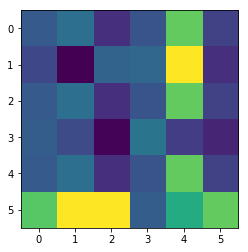

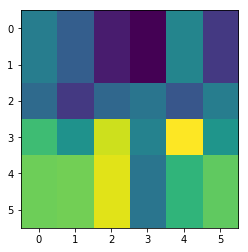

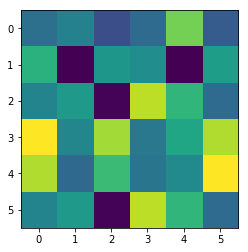

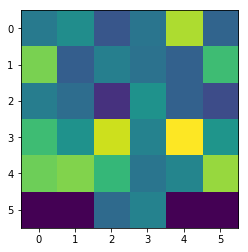

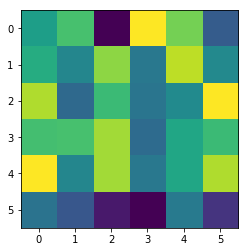

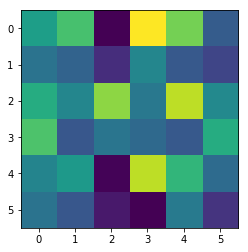

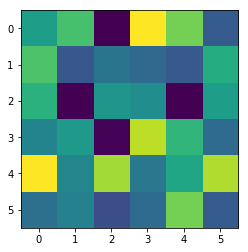

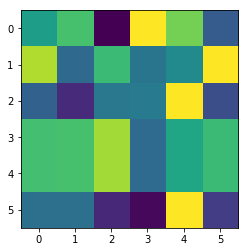

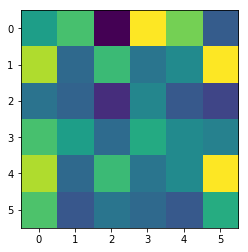

In [28]:
import os, glob
dir = 'C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Zero/*.csv'
df_list=[]
book_dict = {}

for i in glob.glob(dir):
    file_name = os.path.basename(i)
    basename,_=os.path.splitext(file_name)
    book_dict[file_name] = print(i)
    data=pd.read_csv(i, header=None, skiprows=0)
    
    plt.figure()
    plt.imshow(data)
    plt.savefig(f"C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero/{basename}.png")

C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/One\matrix_One_0.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/One\matrix_One_10.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/One\matrix_One_12.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/One\matrix_One_13.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/One\matrix_One_15.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/One\matrix_One_19.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/One\matrix_One_2.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/One\matrix_One_20.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/One\matrix_One_21.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/One\matrix_One_22.csv
C:/Users/user/OneDrive

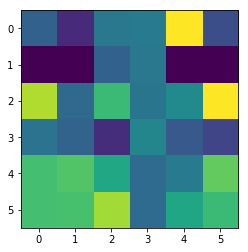

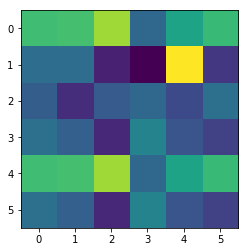

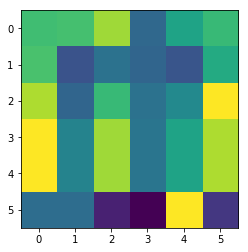

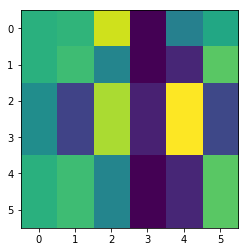

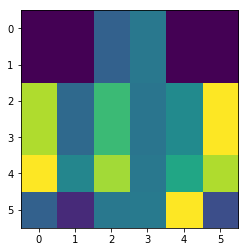

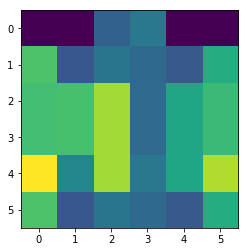

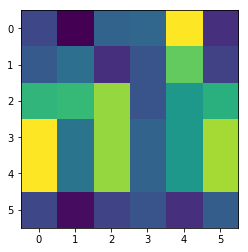

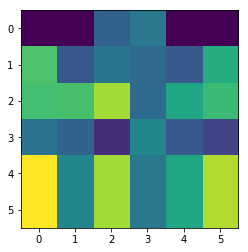

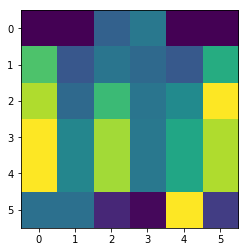

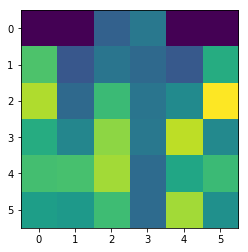

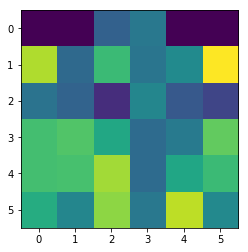

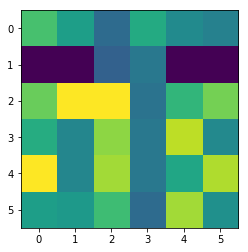

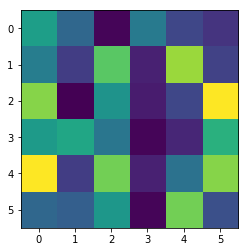

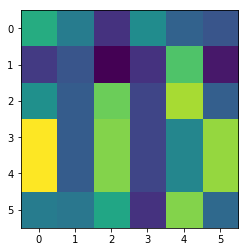

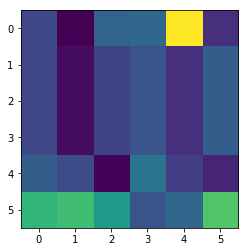

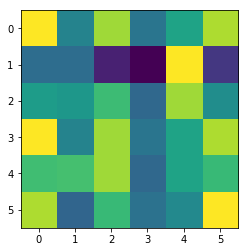

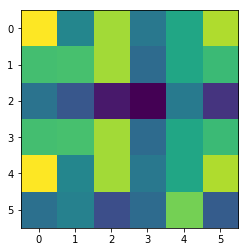

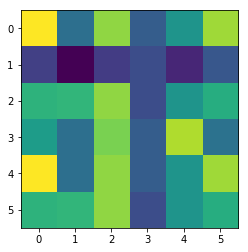

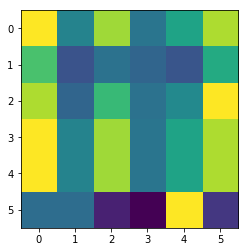

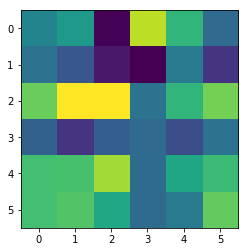

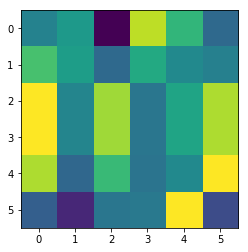

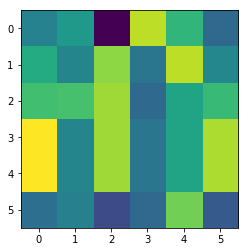

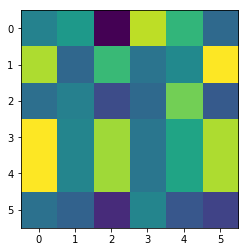

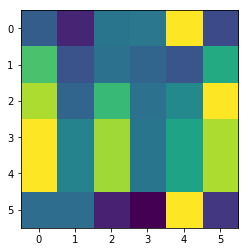

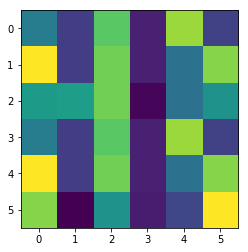

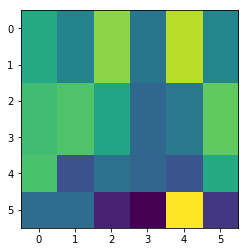

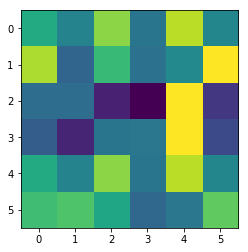

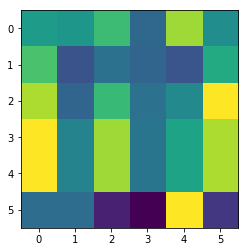

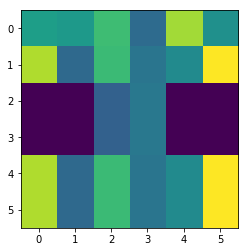

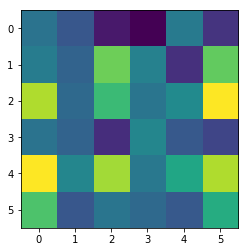

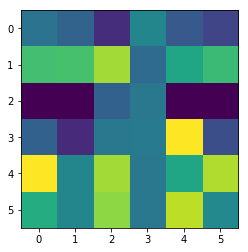

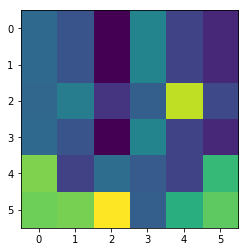

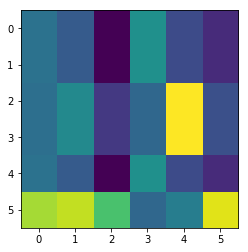

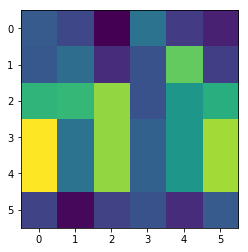

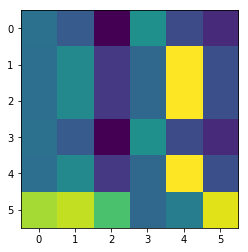

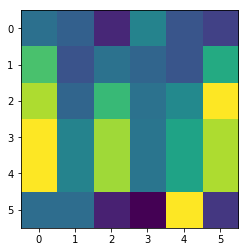

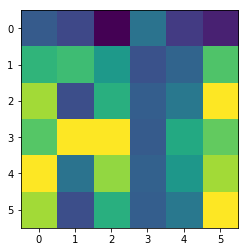

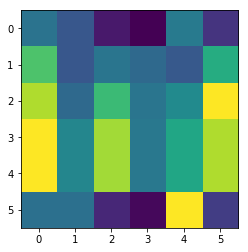

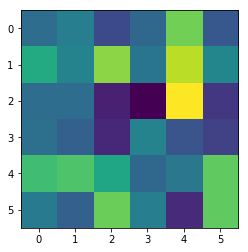

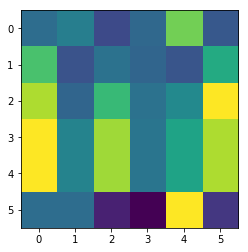

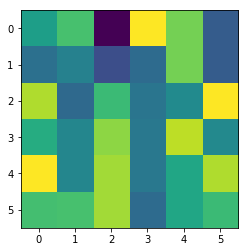

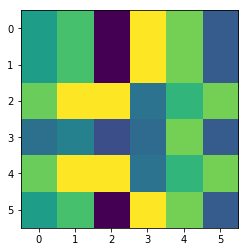

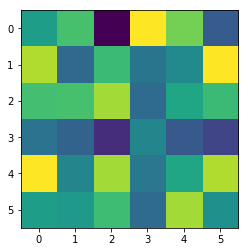

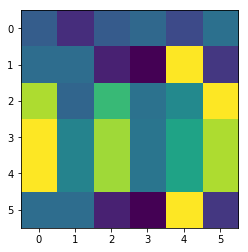

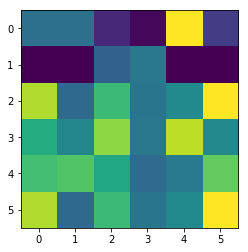

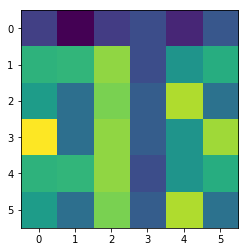

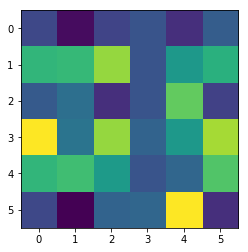

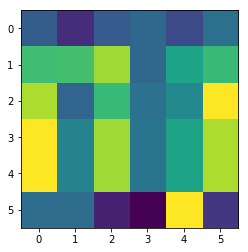

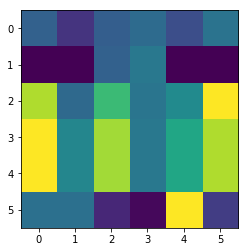

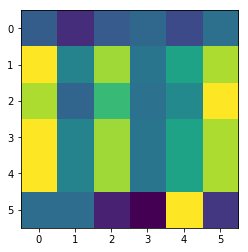

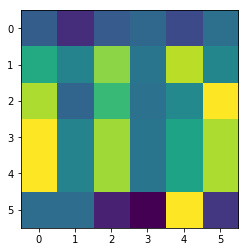

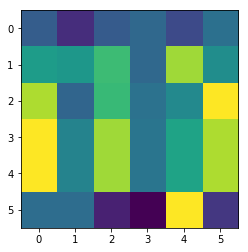

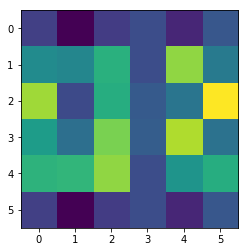

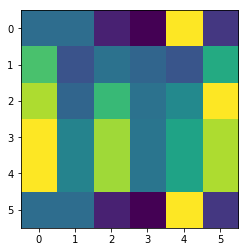

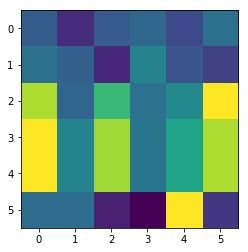

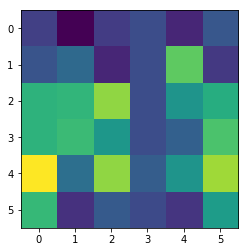

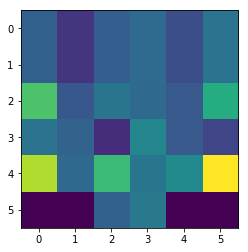

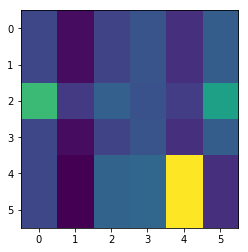

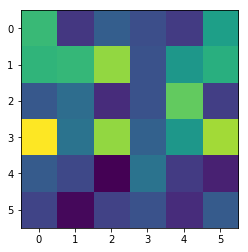

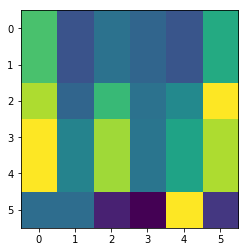

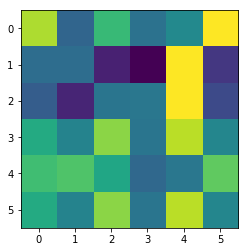

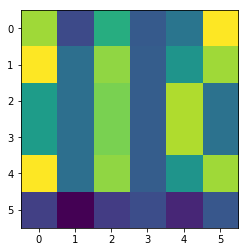

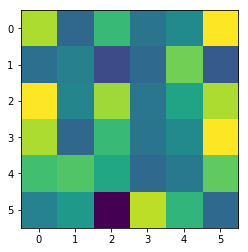

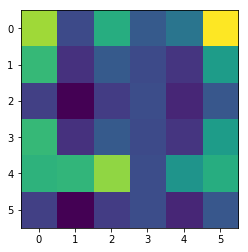

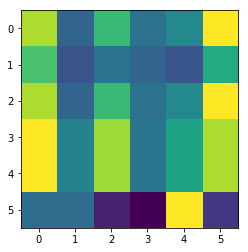

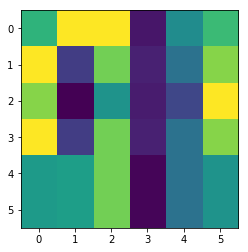

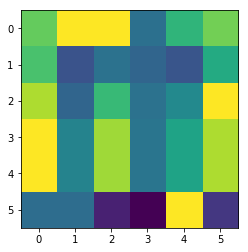

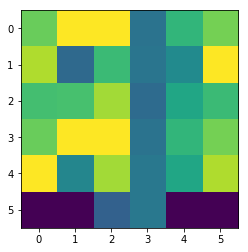

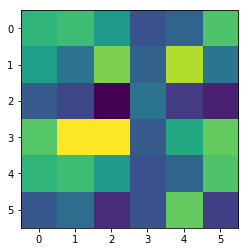

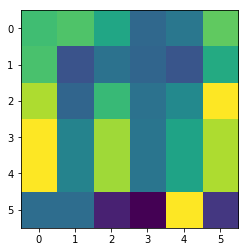

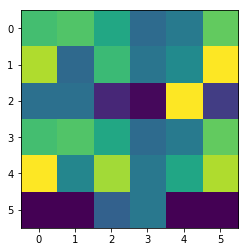

In [29]:
dir = 'C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/One/*.csv'
df_list=[]
book_dict = {}

for i in glob.glob(dir):
    file_name = os.path.basename(i)
    basename,_=os.path.splitext(file_name)
    book_dict[file_name] = print(i)
    data=pd.read_csv(i, header=None, skiprows=0)
    
    plt.figure()
    plt.imshow(data)
    plt.savefig(f"C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/One/{basename}.png")

C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Zero\matrix_Zero_0.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Zero\matrix_Zero_10.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Zero\matrix_Zero_11.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Zero\matrix_Zero_110.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Zero\matrix_Zero_111.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Zero\matrix_Zero_114.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Zero\matrix_Zero_116.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Zero\matrix_Zero_117.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Zero\matrix_Zero_12.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_pre

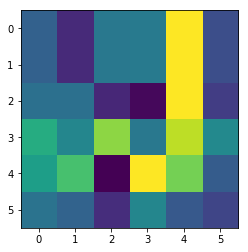

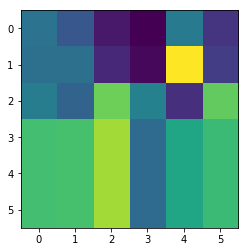

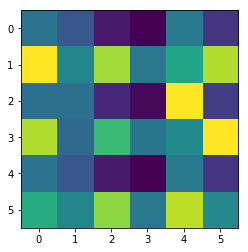

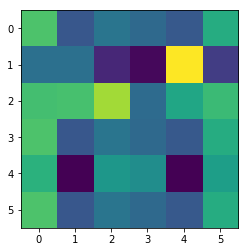

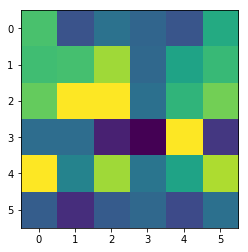

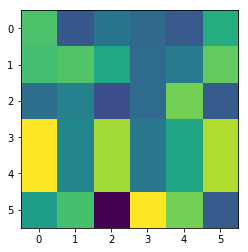

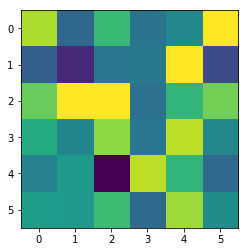

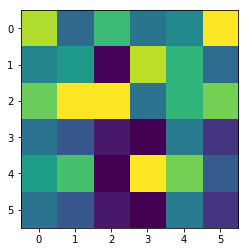

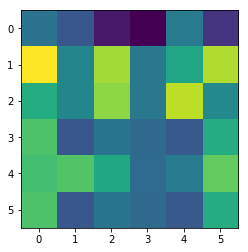

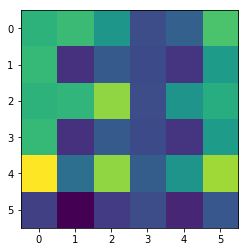

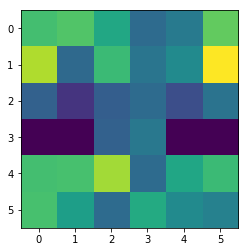

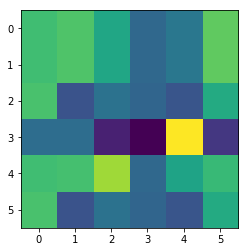

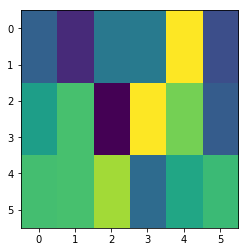

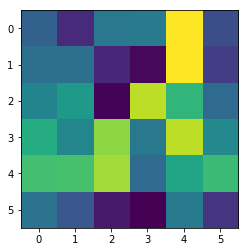

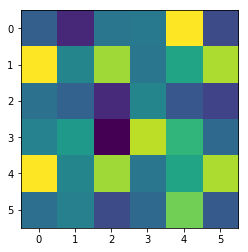

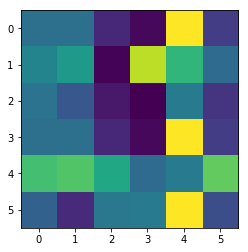

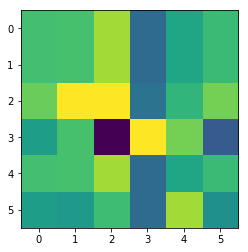

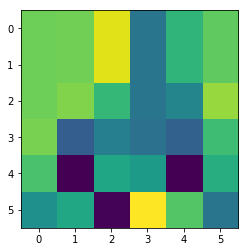

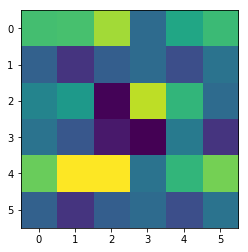

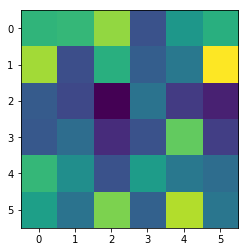

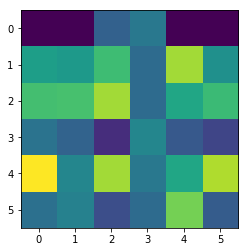

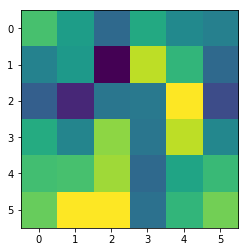

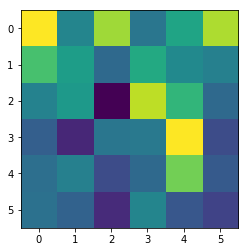

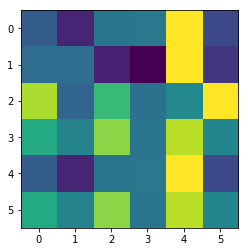

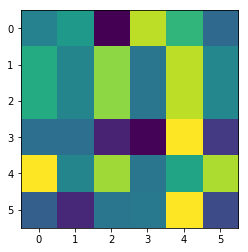

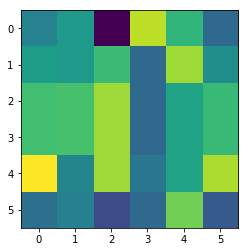

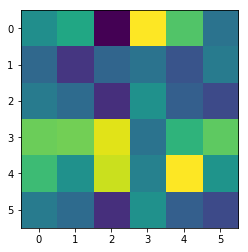

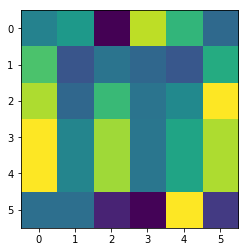

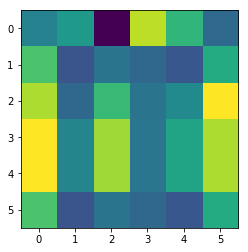

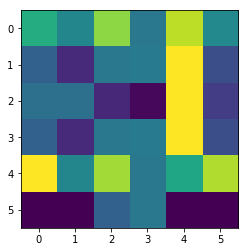

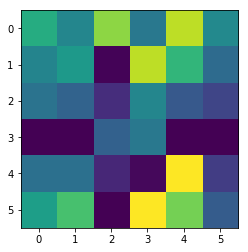

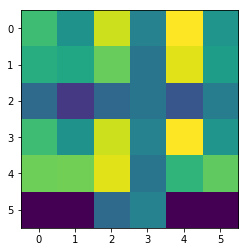

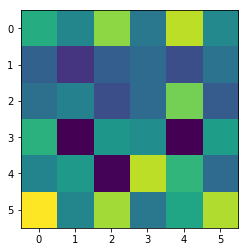

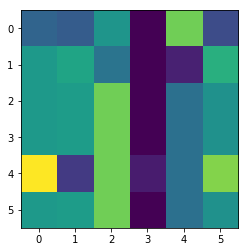

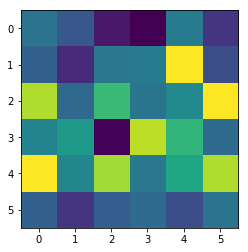

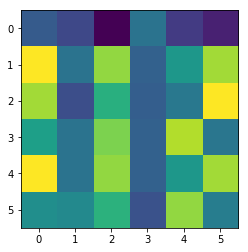

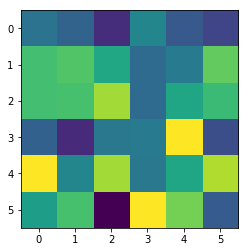

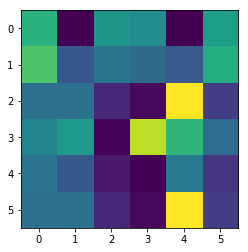

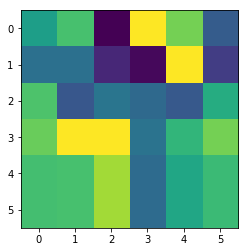

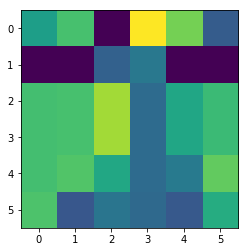

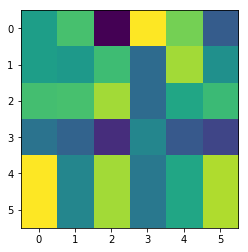

In [30]:
dir = 'C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Zero/*.csv'
df_list=[]
book_dict = {}

for i in glob.glob(dir):
    file_name = os.path.basename(i)
    basename,_=os.path.splitext(file_name)
    book_dict[file_name] = print(i)
    data=pd.read_csv(i, header=None, skiprows=0)
    
    plt.figure()
    plt.imshow(data)
    plt.savefig(f"C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/Zero/{basename}.png")

C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/One\matrix_One_1.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/One\matrix_One_100.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/One\matrix_One_101.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/One\matrix_One_11.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/One\matrix_One_14.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/One\matrix_One_16.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/One\matrix_One_17.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/One\matrix_One_18.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/One\matrix_One_24.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/va

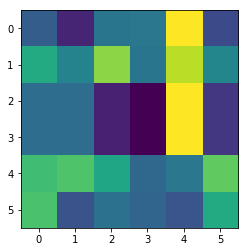

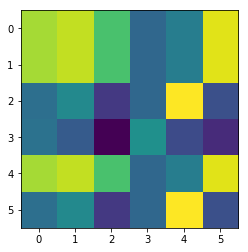

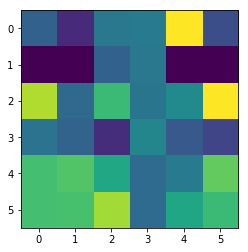

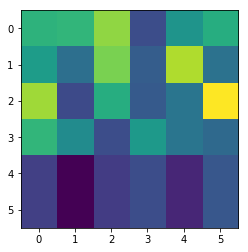

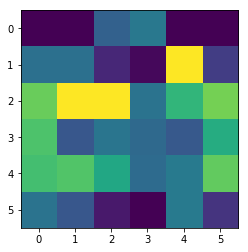

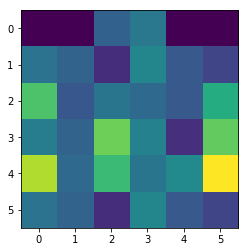

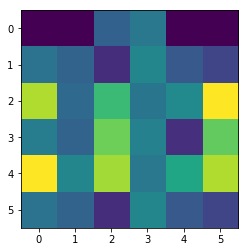

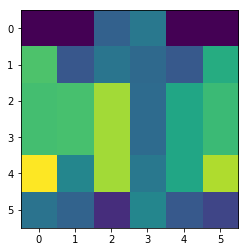

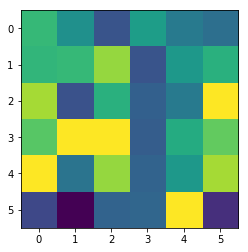

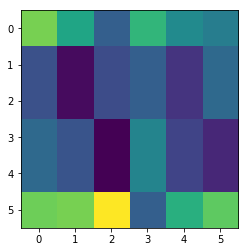

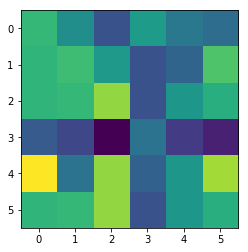

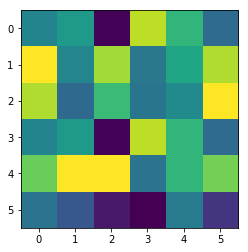

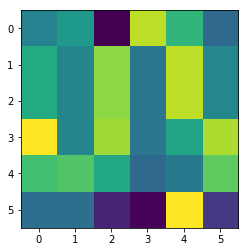

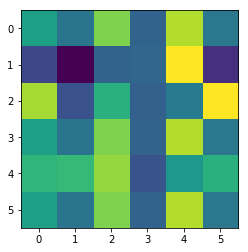

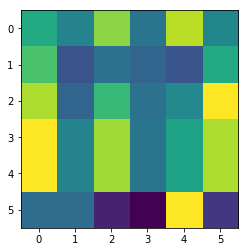

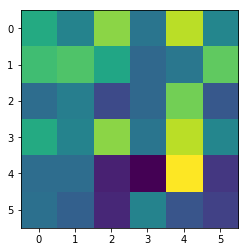

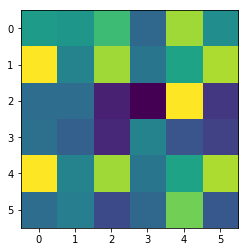

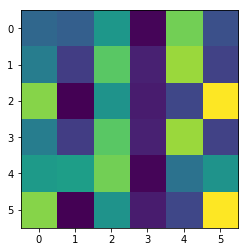

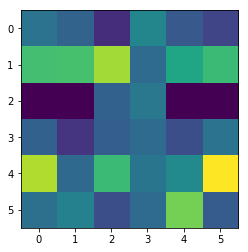

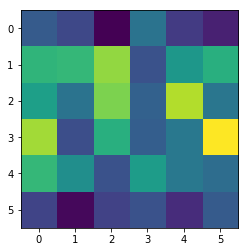

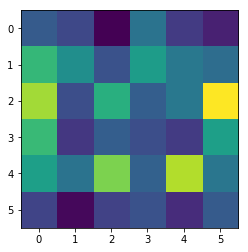

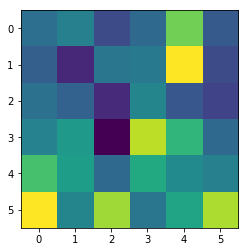

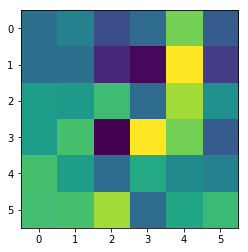

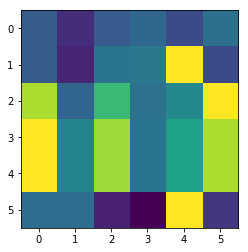

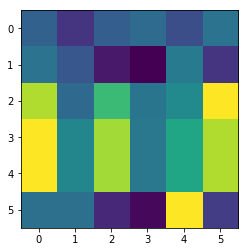

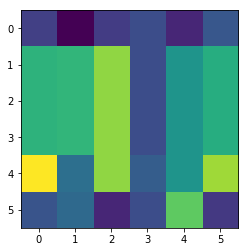

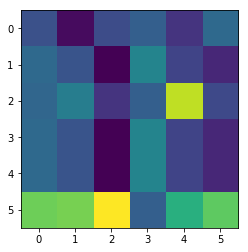

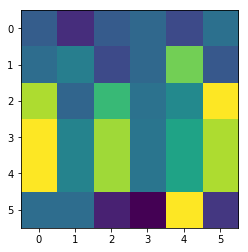

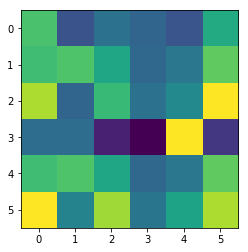

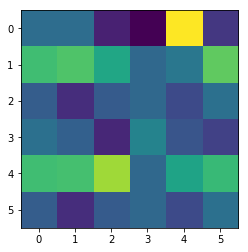

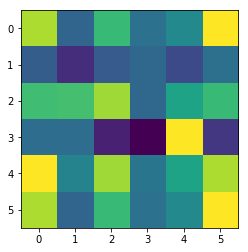

In [31]:
dir = 'C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/One/*.csv'
df_list=[]
book_dict = {}

for i in glob.glob(dir):
    file_name = os.path.basename(i)
    basename,_=os.path.splitext(file_name)
    book_dict[file_name] = print(i)
    data=pd.read_csv(i, header=None, skiprows=0)
    
    plt.figure()
    plt.imshow(data)
    plt.savefig(f"C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/One/{basename}.png")

ImageDataGenerator data-augmentation is done.

In [32]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.callbacks import TensorBoard, ModelCheckpoint

Using TensorFlow backend.


In [33]:
# dimensions of our images.
img_width, img_height = 300, 300

train_data_dir = 'C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/'
validation_data_dir = 'C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/'
nb_train_samples = len(df_train)
nb_validation_samples = len(df_val)
epochs = 50
batch_size = 16

In [34]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [35]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [36]:
model.compile(loss='binary_crossentropy',
optimizer='rmsprop',
metrics=['accuracy'])

In [37]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
rescale=1. / 255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)

In [38]:
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 167 images belonging to 2 classes.
Found 72 images belonging to 2 classes.


In [39]:
model.fit_generator(
    train_generator,
steps_per_epoch=nb_train_samples // batch_size,
epochs=epochs,
validation_data=validation_generator,
validation_steps=nb_validation_samples // batch_size,
callbacks=[
                TensorBoard(log_dir="./logdir_ald"),
                ModelCheckpoint(os.path.join("./logdir_ald",  "model_ald_test.hdf5"), save_best_only=True)
],
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
10/10 [==============================] - 10s 990ms/step - loss: 1.5306 - acc: 0.5500 - val_loss: 0.8727 - val_acc: 0.6094
Epoch 2/50
10/10 [==============================] - 9s 911ms/step - loss: 0.7297 - acc: 0.5623 - val_loss: 0.8228 - val_acc: 0.5536
Epoch 3/50
10/10 [==============================] - 8s 848ms/step - loss: 0.7253 - acc: 0.6126 - val_loss: 0.6625 - val_acc: 0.6250
Epoch 4/50
10/10 [==============================] - 9s 859ms/step - loss: 0.6747 - acc: 0.6126 - val_loss: 0.6635 - val_acc: 0.6250
Epoch 5/50
10/10 [==============================] - 9s 853ms/step - loss: 0.6315 - acc: 0.6440 - val_loss: 0.5925 - val_acc: 0.7500
Epoch 6/50
10/10 [==============================] - 9s 859ms/step - loss: 0.6168 - acc: 0.7058 - val_loss: 0.7612 - val_acc: 0.5781
Epoch 7/50
10/10 [==============================] - 8s 848ms/step - loss: 0.6016 - acc: 0.6890 - val_loss: 0.6309 - val_acc: 0.6786
Epoch 8/50
10/10 [=========